<a href="https://colab.research.google.com/github/Umar-ch01/Performing-EDA-on-datasets/blob/main/EDA%20on%20spotify%20TOP%201000%20track%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from google.colab import files
uploaded = files.upload()


Saving spotify_top_1000_tracks.csv to spotify_top_1000_tracks.csv


In [33]:
import pandas as pd

df = pd.read_csv('/content/spotify_top_1000_tracks.csv')
df.head()


,track_name,artist,album,release_date,popularity,spotify_url,id,duration_min
0,All The Stars (with SZA),Kendrick Lamar,Black Panther The Album Music From And Inspire...,2018-02-09,95,https://open.spotify.com/track/3GCdLUSnKSMJhs4...,3GCdLUSnKSMJhs4Tj6CV3s,3.869767
1,Starboy,The Weeknd,Starboy,2016-11-25,90,https://open.spotify.com/track/7MXVkk9YMctZqd1...,7MXVkk9YMctZqd1Srtv4MB,3.840883
2,Señorita,Shawn Mendes,Señorita,2019-06-21,80,https://open.spotify.com/track/0TK2YIli7K1leLo...,0TK2YIli7K1leLovkQiNik,3.182667
3,Heat Waves,Glass Animals,Dreamland,2020-08-07,87,https://open.spotify.com/track/3USxtqRwSYz57Ew...,3USxtqRwSYz57Ewm6wWRMp,3.980083
4,Let Me Love You,DJ Snake,Encore,2016-08-05,87,https://open.spotify.com/track/0lYBSQXN6rCTvUZ...,0lYBSQXN6rCTvUZvg9S0lU,3.432433


In [34]:
# Check data types and non-null values
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values in each column
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_name    1000 non-null   object 
 1   artist        1000 non-null   object 
 2   album         1000 non-null   object 
 3   release_date  1000 non-null   object 
 4   popularity    1000 non-null   int64  
 5   spotify_url   1000 non-null   object 
 6   id            1000 non-null   object 
 7   duration_min  1000 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB
None
        popularity  duration_min
count  1000.000000   1000.000000
mean     56.669000      3.318516
std      28.192805      0.849591
min       0.000000      0.969150
25%      37.000000      2.754021
50%      68.000000      3.293833
75%      79.000000      3.745721
max      97.000000      9.497883
track_name      0
artist          0
album           0
release_date    0
popularity      0
spotify_ur

In [35]:
print(df.columns)


Index(['track_name', 'artist', 'album', 'release_date', 'popularity',
       'spotify_url', 'id', 'duration_min'],
      dtype='object')


In [36]:
# Identify column types
num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

print("✅ Numeric Columns:", num_cols)
print("✅ Categorical Columns:", cat_cols)


✅ Numeric Columns: ['popularity', 'duration_min']
✅ Categorical Columns: ['track_name', 'artist', 'album', 'release_date', 'spotify_url', 'id']


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


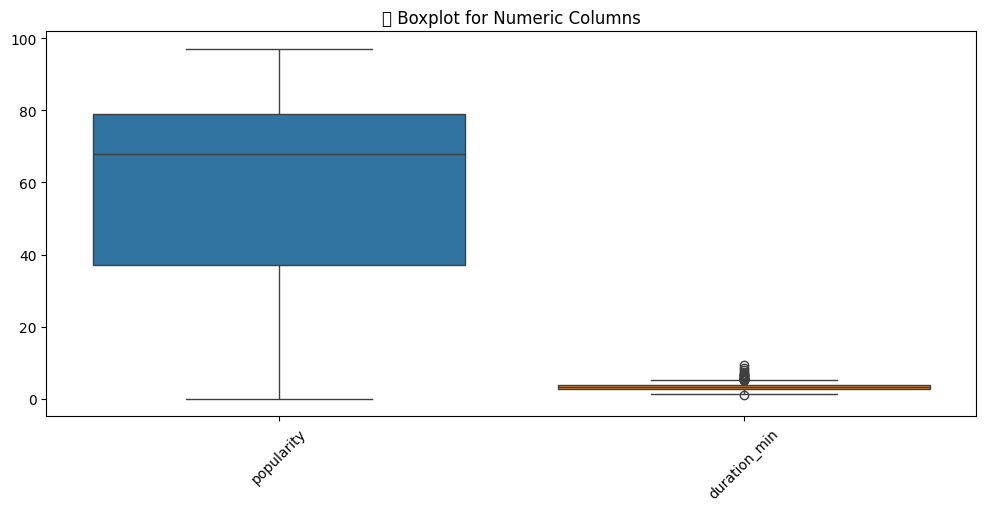

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.boxplot(data=df[num_cols])
plt.title("📊 Boxplot for Numeric Columns")
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


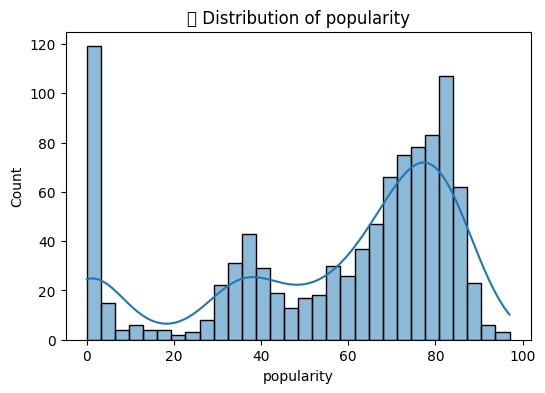

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


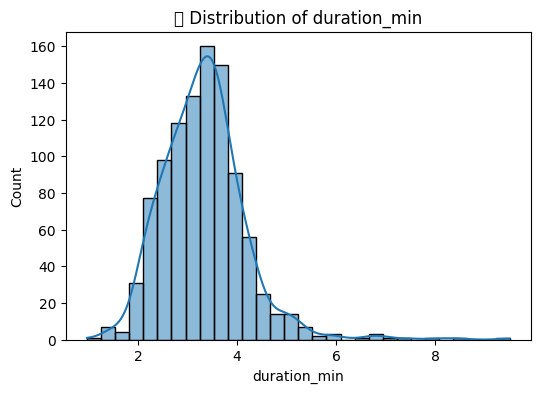

In [38]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"📈 Distribution of {col}")
    plt.show()


In [39]:
for col in cat_cols:
    if df[col].nunique() < 20:  # Avoid overplotting
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x=col)
        plt.title(f"🧮 Countplot of {col}")
        plt.xticks(rotation=45)
        plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


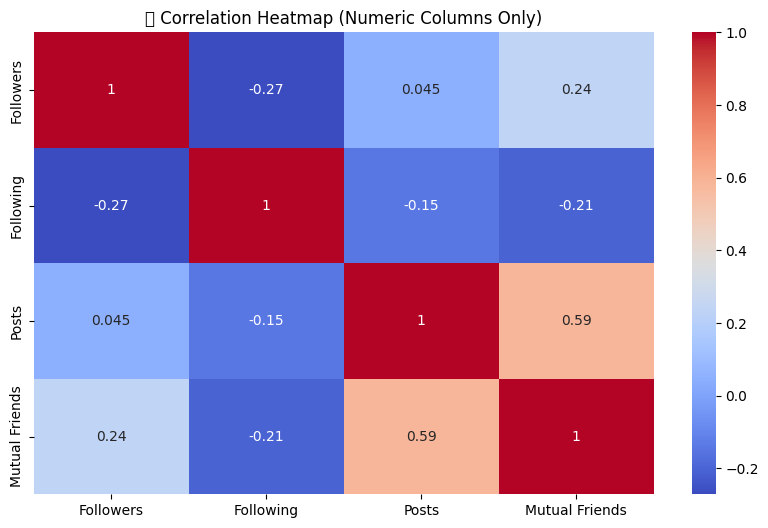

In [31]:
if len(num_cols) >= 2:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
    plt.title("🧪 Correlation Heatmap (Numeric Columns Only)")
    plt.show()
